# Data Exploration 04

You're working with a team of botanists to develop a flower classification system.

Your assignment is to build a k-Nearest Neighbors model to classify flowers based on their petal and sepal sizes.

## Part A: Import and Explore the data

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/iris.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/iris.csv)

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column?
* Do any of the columns have missing values?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
import sklearn.neighbors as neighbors
import sklearn.metrics as metrics
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/iris.csv')

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Part B: Visualize the Data

Use your preferred visualization library to create a scatterplot showing petal length vs petal width. You should plot each flower species as a different color on the scatter plot.

<Axes: xlabel='petal_length', ylabel='petal_width'>

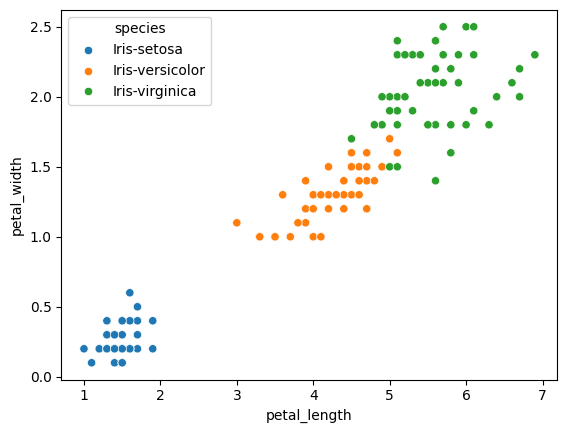

In [5]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

## Part C: Prepare the Data for Machine Learning

Data preparation (sometimes called "data wrangling" or "data munging") is where you'll usually spend the bulk of your time when working on machine learning problems. Only rarely is data already in the optimal form for a given algorithm.

Often we have to deal with missing values, normalize the data, and perform both simple and complex feature engineering to get the data into the form we need.

Once the data is in the correct form, we can then randomize the data and split it into training and test datasets (and sometimes an additional validation dataset).

### Machine Learning Steps

Almost universally, regardless of which algorithm or type of task we're performing, building and evaluating a machine learning model with sklearn follows these steps:

1. Perform any data preprocessing needed.
2. Partition the data into features and targets.
3. Split the data into training and test sets (and sometimes a third validation set).
4. Create a configure whichever sklearn model object we're using.
5. Train the model using its "fit" method.
6. Test the model using its "predict" method.
7. Use a model evaluation metric to see how well the model performs.

If the model isn't performing well, we will repeat one or more of the above steps (sometimes all of them).

Once the model is performing adequately, we'll deploy it for use as part of some larger system.

For now, let's assume that this dataset is in the form we need, and we'll skip to step 2, partitioning the data.


### Step 2. Partition the Data into Features and Targets
First, we'll create a dataframe called "X" containing the features of the data we want to use to make our predictions. In this case, that will be the `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` features.

(The name "X" isn't special, but uppercase X is the conventional name for our feature dataset, because that's what statisticians use to refer to a matrix of independent variables)

In [6]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]


Next we'll create a dataframe called "y" containing the target variable, or the set of values we want to predict. In this case, that will be `species`.

(Once again, the name "y" isn't special, but lowercase y is the conventional name for a list of targets, because that's what statisticians use to refer to a vector of dependent variables)

In [7]:
# Create a new dataframe called y that contians the target we're
# trying to predict

y = df['species']


### Step 3. Split the data into training and test sets.

Now that we have our data divided into features (X) and target values (y), we'll split each of these into a training set and a test set.

We'll use the training sets to "train" our model how to make predictions.

We'll then use our test sets to test how well our model has learned from the training data.

While we could use a bunch of python code to do this step, the sklearn library has lots of built-in functions to handle common data manipulations related to machine learning.

For this step, we'll use the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [38]:
# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)


After creating the training and test splits, output the head() of each one and notice how they row numbers have been randomized.

Also notice that X_train and y_train's row numbers match up, as do X_test and y_test's row numbers.

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## Part D: Create and Train a Model

We're going to create a model based on the k-Nearest Neighbors algorithm.

Since this is a classification task, (we're trying to classify which species a given flower belongs to), we'll use sklearn's [KNeighborsClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

### Step 4. Create and configure the model

We start by importing the information about the model we want to create. In python, this information is called a _class_.

The KNeighborsClassifier class contains all of the information python needs to create a kNN Classifier.

Once we've imported the class, we'll create an _instance_ of the class using this syntax:

    whatever = ClassName( parameter_one = value, parameter_two = something_else, etc...)

In our case, the class name is `KNeighborsClassifer`. It doesn't matter what we call the variable that holds the instance, but one popular convention is to call classifier instances `clf`, so that's what you'll see in the sklearn documentation.

The only parameter we want to configure is the `n_neighbors` parameter, which controls the value of `k` in the kNN algorithm.

In [33]:
# Import the KNeighborsClassifier class from sklearn
# Note that it's in the neighbors submodule. See the example code in the
# documentation for details on how to import it


In [34]:
# Create an instance of the model, configuring it to use the 3 nearest neighbors
# store the instance in a variable

clf = neighbors.KNeighborsClassifier(n_neighbors=3)


### Step 5: Train the model

Next we'll train the model. We do this by providing it with the training data we split off from the dataset in step 3.

The model "learns" how to associate the feature values (X) with the targets (y). The exact process it uses to learn how to do this depends on which algorithm we're using.

Sometimes, this is called "fitting the data to the model", so in sklearn, we perform this step using the [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit) method.

In [35]:
# Call the "fit" method of the classifier instance we created in step 4.
# Pass it the X_train and y_train data so that it can learn to make predictions

clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

## Part E: Make Predictions and Evaluate the Model

Now that the model has been created and trained, we can use it to make predictions. Since this is a classification model, when we give it a set of features, it tells us what the most likely target value is.

In this case, we tell the model "here are the values for petal width, petal length, sepal width, and sepal length for a particular flower" The model then tells us which species is the most likely for that flower.

When testing how well our model works, we'll use the test data we split off earlier. It contains the measurements for several flowers, along with their species.

### Step 6: Make Predictions on Test Data

We'll give the measurements of each flower to the model and have it predict their species. We'll then compare those predictions to the known values to determine how accurate our model is.

Since this is a classification model, there are two different methods we can use to make predictions:

- [predict()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict), which returns the most likely prediction for each sample.

- [predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba) which returns a list of probabilities for each sample. The probabilities tell us how confident the model is that the corresponding sample belongs to a particular class.

In [40]:
# Use the predict() method to get a list of predictions for the samples in our
# test data. Then output those predictions

y_pred = clf.predict(X_test)
y_pred


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [39]:
# Just a quick comparison with y_test to see if they match up

y_test


,species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor
31,Iris-setosa
64,Iris-versicolor
141,Iris-virginica
68,Iris-versicolor
82,Iris-versicolor


### Step 7: Evaluate the Model

There are several metrics we can use to determine how well our model is performing.

Most of them are in the [sklearn.metrics library](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).

Most of the sklearn metric function work using the same pattern. We import the function, then give it a list of the true values for our test data, and a list of the values the model predicted for our test data. The metric then outputs the value. How we interpret that value will depend on the exact problem we're solving, the qualities of our data, and the particular metric we're using.

#### Accuracy
Since this is a multiclass classification problem ("multiclass" means we have more than two options we're choosing from), we can get a quick estimate from the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function, which tells us the percent of correct predictions made by the model.

In [41]:
# Import the accuracy_score function and use it to determine
# how accurate the models predictions were for our test data

metrics.accuracy_score(y_test, y_pred)


1.0

#### Confusion Matrix
While the accuracy score tells us a little about the model's performance, it doesn't tell us much.

For example, we know how often the model was correct, but we don't know when it was wrong or why.

We can get this information from the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) function.

In [31]:
# Import the confusion_matrix function and use it to generate a confusion
# matrix of our model results.

metrics.confusion_matrix(y_test, y_pred)


array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 13]])

#### Confusion Matrix Plot

It's easier to see the results of the confusion matrix if we plot the results. One way to do this is with Seaborn's [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

This function works a little bit differently than the others. It takes as parameters your model instance, and then options for making the chart display the way you want, and outputs a confusion matrix showing how well the model did in predicting the target values.

You'll notice that in many cases (including this one), the numbers in the confusion matrix will be the same as the results you see from the confusion_matrix() function above, but the plot makes it easier to interpret the results.

When using the confusion matrix, you may find that the default color mapping is difficult to read. The "Blues" mapping is a popular choice.

<Axes: >

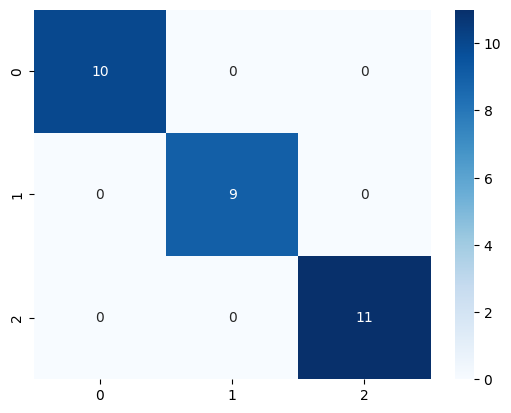

In [24]:
# Create a Seaborn heatmap

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')


## 🌟 Above and Beyond 🌟

Once you've complted the basics, try to complete one or more of the following tasks:

1. See if you can get better results from your model through some data preprocessing, such as normalization.

2. Often, using too many features can give poor results. Can you get better performance using a subset of the features instead of all four?

3. Are there other ways you could visualize your model results?